In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [6]:
path = "C:/Users/Damoon/Dropbox (work)/McGill Teaching/data/other_datasets/bank/"
#"/home/damoon/Dropbox/McGill Teaching/data/other_datasets/bank/"

In [7]:
filename = path + "bank.csv"

In [8]:
print(filename)

C:/Users/Damoon/Dropbox (work)/McGill Teaching/data/other_datasets/bank/bank.csv


In [9]:
data = pd.read_csv(filename, sep = ";")

In [10]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
# Columns' names
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

## Missing Values

In [13]:
pd.isnull(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data[data.isnull().any(1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [15]:
data.isnull().values.any(0)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [16]:
# total num of missing values
data.isnull().sum().sum()

0

In [17]:
data = data.dropna()

In [18]:
print(data.shape)

(4521, 17)


In [19]:
print(list(data.columns));

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [20]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [21]:
data["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [22]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

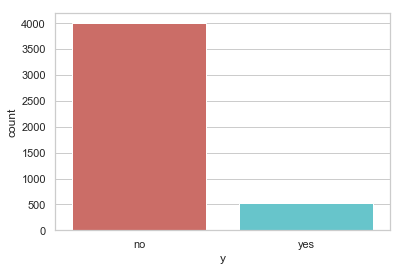

<Figure size 432x288 with 0 Axes>

In [23]:
sns.countplot(x='y', data = data, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [24]:
count_no_sub = len(data[data['y']==0])

In [25]:
print(count_no_sub)

0


In [26]:
count_sub = len(data[data['y']==1])

In [27]:
print(count_sub)

0


In [28]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [29]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286


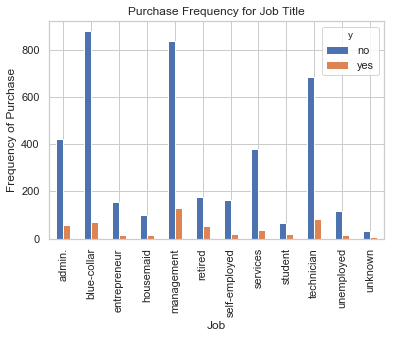

In [30]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

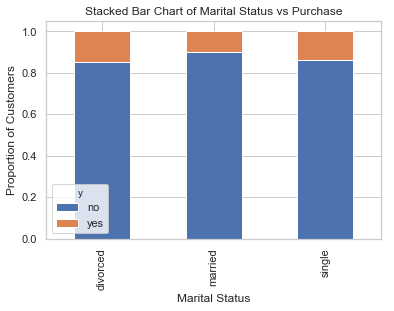

In [31]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.

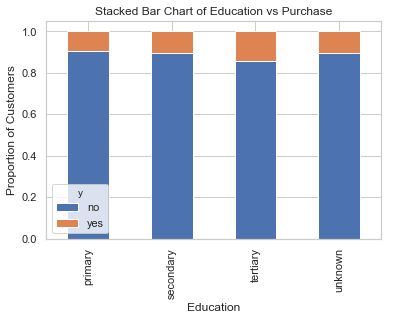

In [32]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

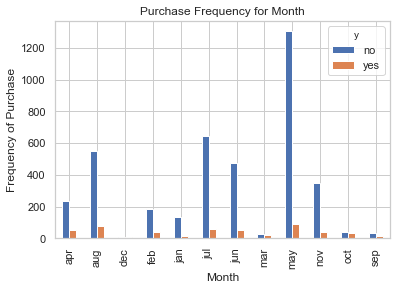

In [33]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

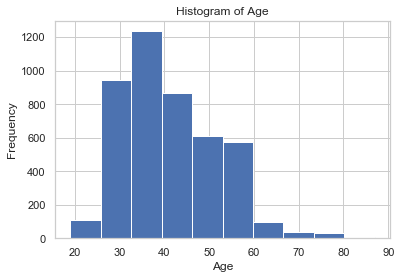

In [34]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40.

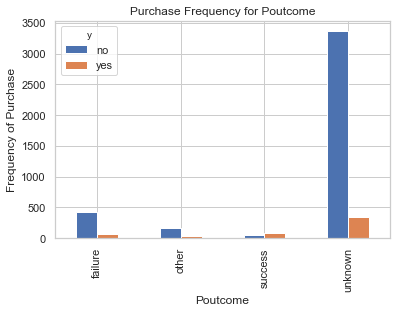

In [35]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

# Logistic Regression Model Fitting

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [37]:
X = data[['balance']]
y = data['y']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
X_train.head()

,balance
565,56
3480,440
2125,3554
3452,0
1667,-346


In [40]:
X_test.head()

,balance
4274,378
72,6248
1065,0
3185,529
130,168


In [41]:
print(len(X), len(y), len(X_train),len(X_test),len(y_train),len(y_test))

4521 4521 3164 1357 3164 1357


In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicting the test set results and calculating the accuracy

We can check how our fitted model perform on the training set itself:

In [43]:
y_train_pred = logreg.predict(X_train)

In [44]:
y_train_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [45]:
y_train_pred == y_train

565      True
3480     True
2125     True
3452     True
1667     True
3228     True
3763     True
929      True
2031     True
4296     True
2486    False
1240     True
3664     True
1877     True
1287    False
3097     True
3685     True
3830     True
71       True
390      True
2200     True
1334    False
169      True
743     False
4470     True
951      True
2873     True
190      True
1505     True
2729     True
        ...  
714      True
544      True
2745     True
3337     True
423      True
3219    False
659      True
797      True
755      True
2008     True
99      False
2496     True
1871     True
2046     True
2163     True
2893     True
537      True
1701     True
2897     True
2222     True
2135     True
2599     True
705     False
3468     True
4373     True
1033     True
3264     True
1653    False
2607     True
2732     True
Name: y, Length: 3164, dtype: bool

You can see that the model makes mistake even on the training set itself (why?)

In [46]:
logreg.score(X_train, y_train_pred) 
# accuracy of the model applied to the first element is compared to the second element = 
# = accuraty ( model.predict(X_train) ,  y_train_pred) -----> that's why it is 1 here

1.0

In [47]:
# Train set performance (Accuracy)
logreg.score(X_train, y_train)

0.8881163084702908

In [48]:
# Test set performance (Accuracy)
logreg.score(X_test, y_test)

0.8769344141488578

In [49]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [50]:
y_pred = logreg.predict(X_test)

In [51]:
print(y_pred)

['no' 'no' 'no' ... 'no' 'no' 'no']


## Confusion Matrix 

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
print(confusion_matrix(y_test, y_pred))

[[1190    0]
 [ 167    0]]


## Precision, Recall, F-Scores, Support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         no       0.88      1.00      0.93      1190
        yes       0.00      0.00      0.00       167

avg / total       0.77      0.88      0.82      1357



C:\Users\Damoon\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Interpretation:** 

Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer’s preferred term deposits that were promoted.